In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../Data/Raw/SQL_Happiness.csv")

In [3]:
# Separate 2024 data from previous years
df_2024 = df[df["Year"] == 2024]
df_other_years = df[df["Year"] != 2024]

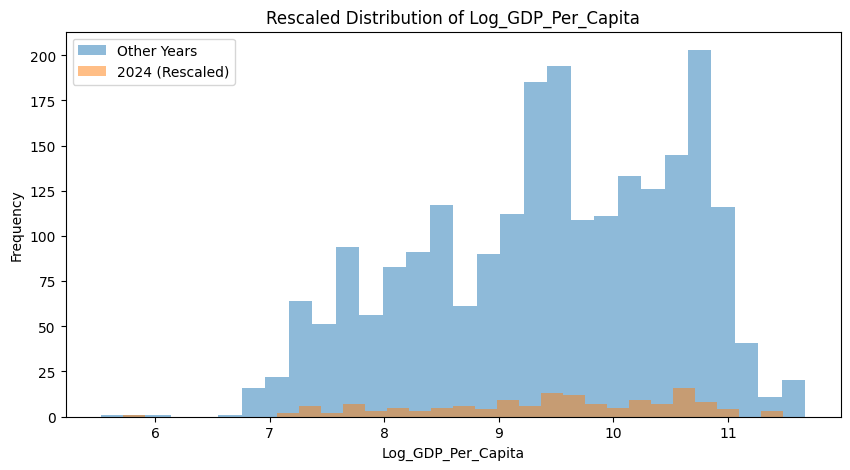

In [4]:
# Calculate mean and standard deviation for previous years
mean_other_years = df_other_years["Log_GDP_Per_Capita"].mean()
std_other_years = df_other_years["Log_GDP_Per_Capita"].std()

# Standardize 2024 data using previous years' statistics
df.loc[df["Year"] == 2024, "Log_GDP_Per_Capita"] = (
    (df_2024["Log_GDP_Per_Capita"] - df_2024["Log_GDP_Per_Capita"].mean()) / df_2024["Log_GDP_Per_Capita"].std()
) * std_other_years + mean_other_years

# Verify the transformation by plotting the new distribution
plt.figure(figsize=(10,5))
plt.hist(df_other_years["Log_GDP_Per_Capita"], bins=30, alpha=0.5, label="Other Years")
plt.hist(df[df["Year"] == 2024]["Log_GDP_Per_Capita"], bins=30, alpha=0.5, label="2024 (Rescaled)")
plt.xlabel("Log_GDP_Per_Capita")
plt.ylabel("Frequency")
plt.title("Rescaled Distribution of Log_GDP_Per_Capita")
plt.legend()
plt.show()

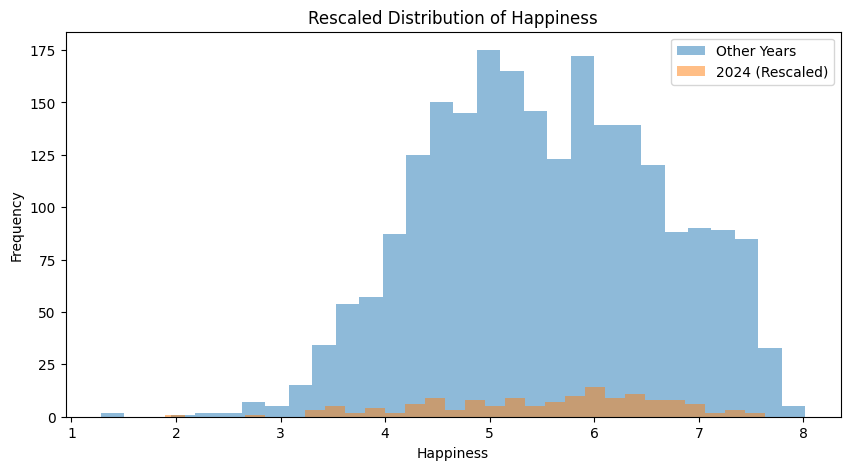

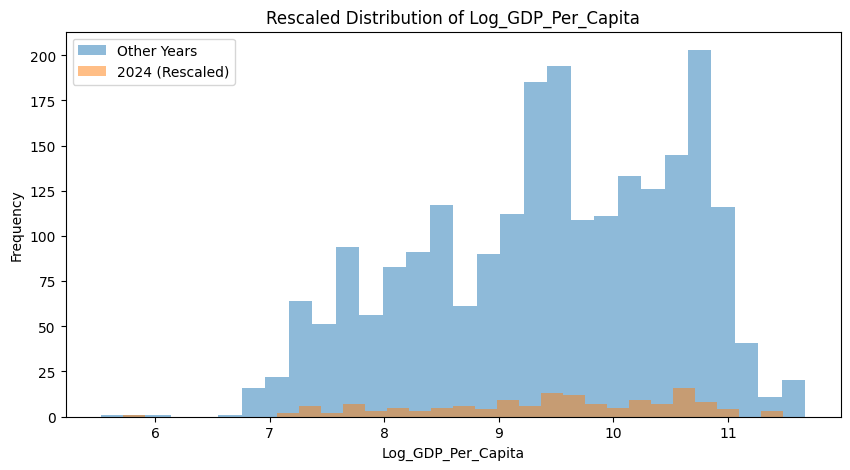

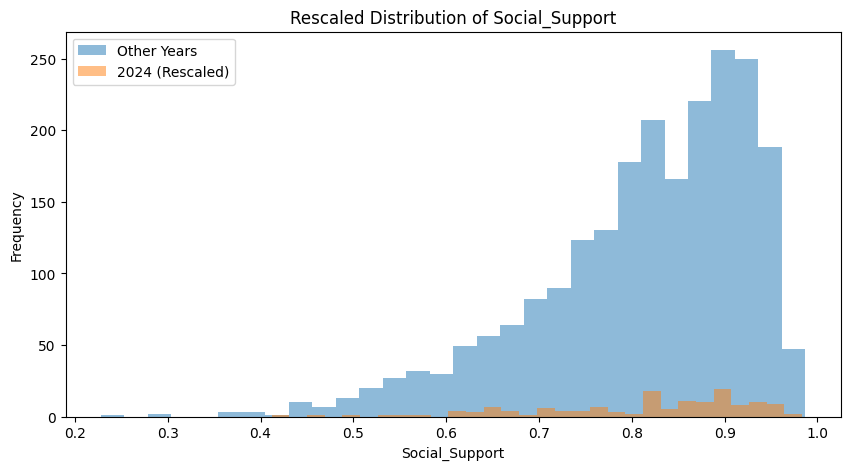

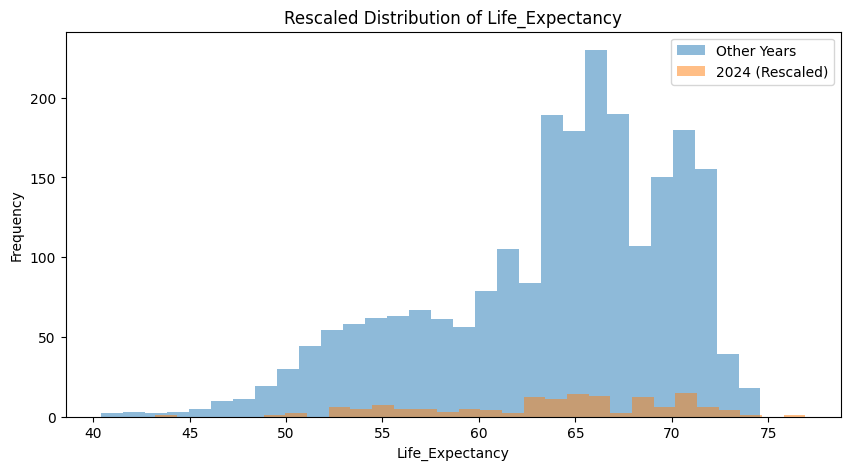

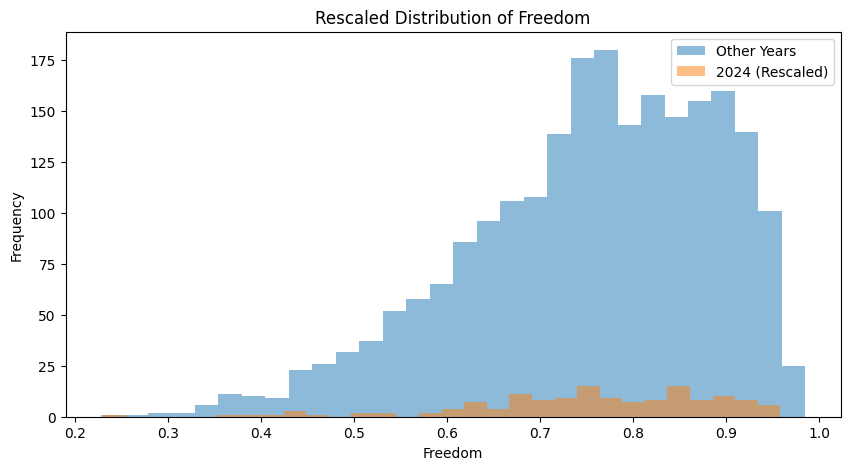

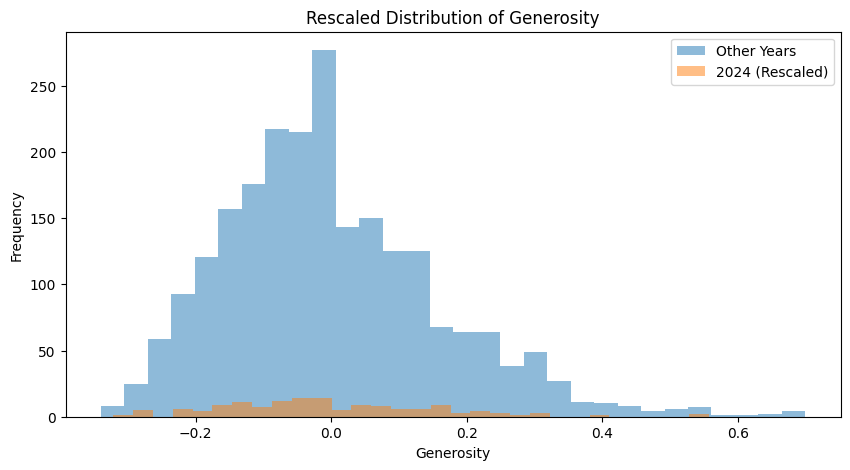

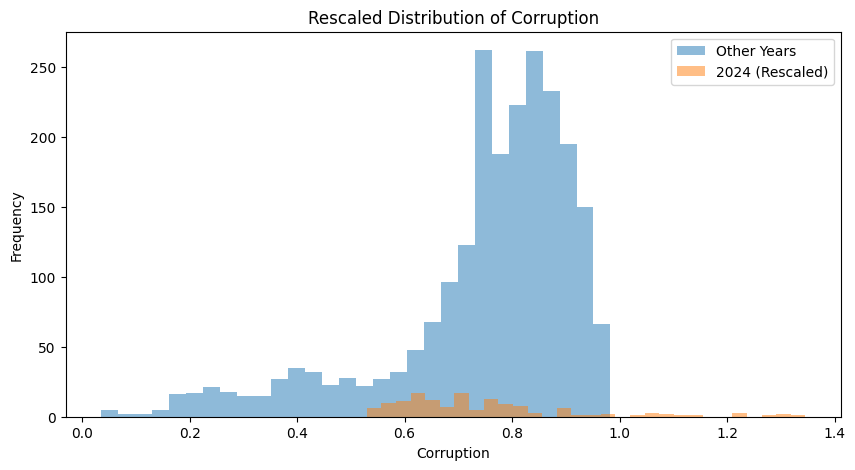

In [5]:
# List of numerical columns to rescale
columns_to_rescale = [
    "Happiness",
    "Log_GDP_Per_Capita",
    "Social_Support",
    "Life_Expectancy",
    "Freedom",
    "Generosity",
    "Corruption"
]

# Rescale each column
for col in columns_to_rescale:
    # Compute mean and std for previous years
    mean_other_years = df_other_years[col].mean()
    std_other_years = df_other_years[col].std()

    # Standardize 2024 data using previous years' statistics
    df.loc[df["Year"] == 2024, col] = (
        (df_2024[col] - df_2024[col].mean()) / df_2024[col].std()
    ) * std_other_years + mean_other_years

    # Plot the new distribution
    plt.figure(figsize=(10, 5))
    plt.hist(df_other_years[col], bins=30, alpha=0.5, label="Other Years")
    plt.hist(df[df["Year"] == 2024][col], bins=30, alpha=0.5, label="2024 (Rescaled)")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.title(f"Rescaled Distribution of {col}")
    plt.legend()
    plt.show()


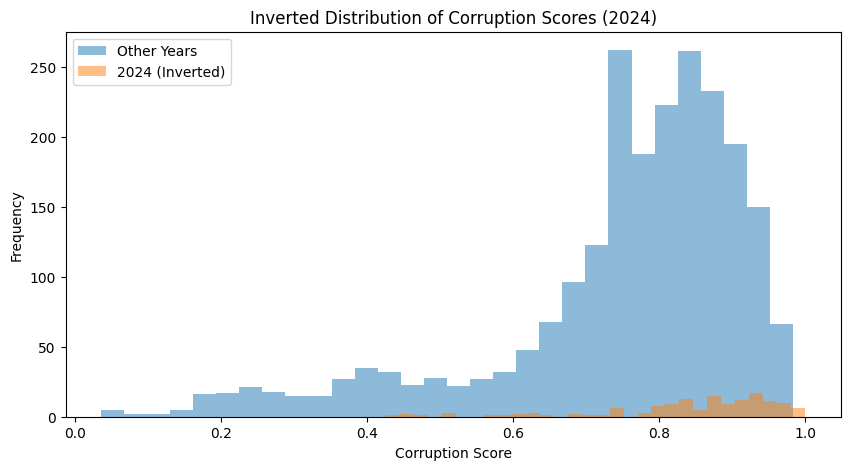

In [6]:
# Invert the corruption scores for 2024
df.loc[df["Year"] == 2024, "Corruption"] = 1 - df_2024["Corruption"]

# Plot the updated corruption score distribution
plt.figure(figsize=(10, 5))
plt.hist(df_other_years["Corruption"], bins=30, alpha=0.5, label="Other Years")
plt.hist(df[df["Year"] == 2024]["Corruption"], bins=30, alpha=0.5, label="2024 (Inverted)")
plt.xlabel("Corruption Score")
plt.ylabel("Frequency")
plt.title("Inverted Distribution of Corruption Scores (2024)")
plt.legend()
plt.show()

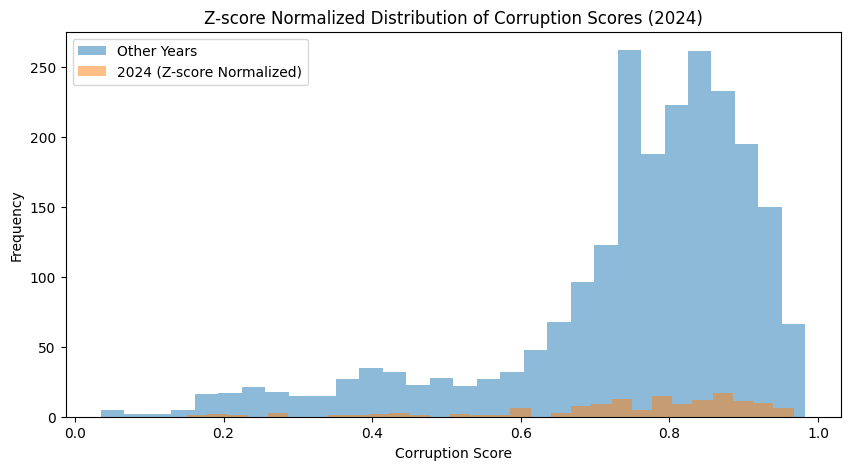

In [7]:
# Calculate mean and standard deviation for previous years' corruption scores
mean_other_years_corruption = df_other_years["Corruption"].mean()
std_other_years_corruption = df_other_years["Corruption"].std()

# Apply Z-score normalization to 2024 corruption scores
df.loc[df["Year"] == 2024, "Corruption"] = (
    (df[df["Year"] == 2024]["Corruption"] - df[df["Year"] == 2024]["Corruption"].mean()) / 
    df[df["Year"] == 2024]["Corruption"].std()
) * std_other_years_corruption + mean_other_years_corruption

# Plot the updated corruption score distribution
plt.figure(figsize=(10, 5))
plt.hist(df_other_years["Corruption"], bins=30, alpha=0.5, label="Other Years")
plt.hist(df[df["Year"] == 2024]["Corruption"], bins=30, alpha=0.5, label="2024 (Z-score Normalized)")
plt.xlabel("Corruption Score")
plt.ylabel("Frequency")
plt.title("Z-score Normalized Distribution of Corruption Scores (2024)")
plt.legend()
plt.show()


In [8]:
#Checking Denmark (125)
df[df['Country_ID'] == 125]

,Happiness_ID,Country_ID,Year,Happiness,Log_GDP_Per_Capita,Social_Support,Life_Expectancy,Freedom,Generosity,Corruption
0,1,125,2005,8.01900,10.849000,0.972000,68.300000,0.97100,0.000000,0.237000
1,2,125,2008,7.97100,10.878000,0.954000,68.960000,0.97000,0.266000,0.248000
4,5,125,2007,7.83400,10.889000,0.954000,68.740000,0.93200,0.234000,0.206000
6,7,125,2011,7.78800,10.845000,0.962000,69.620000,0.93500,0.292000,0.220000
10,11,125,2010,7.77100,10.836000,0.975000,69.400000,0.94400,0.237000,0.175000
13,14,125,2021,7.69900,10.968000,0.945000,71.250000,0.93300,0.130000,0.173000
16,17,125,2019,7.69300,10.948000,0.958000,71.000000,0.96300,0.015000,0.174000
17,18,125,2009,7.68300,10.822000,0.939000,69.180000,0.94900,0.258000,0.206000
24,25,125,2018,7.64900,10.936000,0.958000,70.875000,0.93500,0.012000,0.151000
32,33,125,2017,7.59400,10.922000,0.952000,70.750000,0.95500,0.149000,0.181000


In [17]:
df.head()

,Happiness_ID,Country_ID,Year,Happiness,Log_GDP_Per_Capita,Social_Support,Life_Expectancy,Freedom,Generosity,Corruption
0,1,125,2005,8.019,10.849,0.972,68.300,0.971,0.000,0.237
1,2,125,2008,7.971,10.878,0.954,68.960,0.970,0.266,0.248
2,3,124,2020,7.889,10.766,0.962,71.075,0.962,-0.123,0.164
3,4,124,2018,7.858,10.780,0.962,70.925,0.938,-0.133,0.199
4,5,125,2007,7.834,10.889,0.954,68.740,0.932,0.234,0.206


In [ ]:
#Saving file with proper coding for SQL
df.to_csv("../Data/Clean/SQL_data/Happiness_Combined_SQL.csv", index=False, sep=";", encoding="utf-8")

In [ ]:
#Saving other files for SQL upload
df_js = pd.read_csv("../Data/Clean/SQL_data/Job_Satisfaction_SQL.csv")
df_js.to_csv("../Data/Clean/SQL_data/Job_Satisfaction_SQL.csv", index=False, sep=";", encoding="utf-8")

In [ ]:
#Saving other files for SQL upload
df_wh = pd.read_csv("../Data/Clean/SQL_data/Work_Hours_SQL.csv")
df_wh.to_csv("../Data/Clean/SQL_data/Work_Hours_SQL.csv", index=False, sep=";", encoding="utf-8")

In [ ]:
#Saving other files for SQL upload
df_ct = pd.read_csv("../Data/Clean/SQL_data/Country_SQL.csv")
df_ct.to_csv("../Data/Clean/SQL_data/Country_SQL.csv", index=False, sep=";", encoding="utf-8")